**PubChem**

In [1]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
dfPub = pd.read_csv('pubchem_cdk2.csv')

In [3]:
dfPub.head(2)

,Unnamed: 0,activity,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,inactive,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,active,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dfPub['activity'].value_counts()

,count
activity,
inactive,839
active,518


In [5]:
dfPub1= dfPub.drop(['Unnamed: 0'], axis=1)


In [6]:
#dfPub1.head(2)
#len(dfPub1)
#dfPub1.info()
dfPub1.isnull().sum().sum()


np.int64(0)

In [7]:
import numpy as np

from sklearn.model_selection import train_test_split

In [8]:
dfPub1.head(2)

,activity,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,inactive,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,active,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**LabelEncoder**

In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder()

dfPub1['activity']= label_encoder.fit_transform(dfPub1['activity'])


dfPub1['activity'].value_counts()

,count
activity,
1,839
0,518


In [10]:

X = dfPub1.drop(['activity'], axis=1)
y = dfPub1['activity']

<Axes: ylabel='count'>

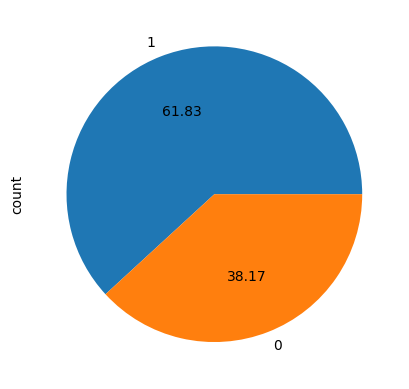

In [11]:

y.value_counts().plot.pie(autopct='%.2f')

**SPLIT**

In [12]:
X.shape, y.shape

((1357, 881), (1357,))

In [13]:
len(y)

1357

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)


<Axes: ylabel='count'>

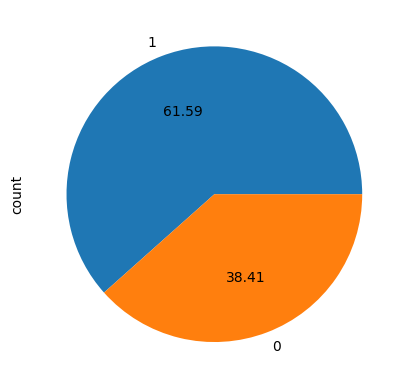

In [15]:
y_train.value_counts().plot.pie(autopct='%.2f')

In [16]:

y_train.value_counts()

,count
activity,
1,752
0,469


**Balancing the imbalanced data**

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [18]:
y_train.value_counts()

,count
activity,
1,752
0,752


**Preprocessing**

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((1504, 881), (1504,), (136, 881), (136,))

**LogisticRegression**

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 100)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        49
           1       0.91      0.84      0.87        87

    accuracy                           0.85       136
   macro avg       0.83      0.85      0.84       136
weighted avg       0.85      0.85      0.85       136



**Confusion matrix**

In [23]:
confusion_matrix(y_test,y_pred)

array([[42,  7],
       [14, 73]])

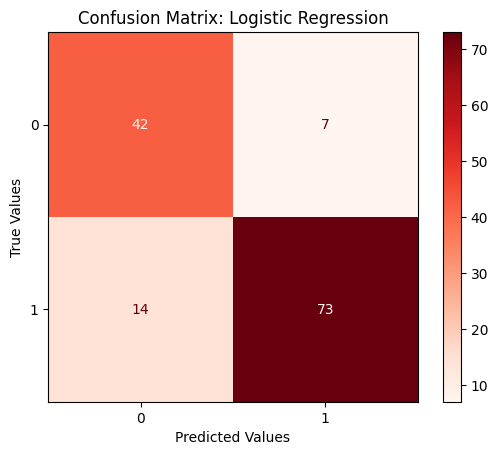

In [24]:
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

plt.show()

**Evaluation Metrics**

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
rlr_probs = [0 for _ in range(len(y_test))]
rflr_probs = lr.predict_proba(X_test)

rflr_probs = rflr_probs[:, 1]

rflr_auc = roc_auc_score(y_test, rflr_probs)
print('Logistic Regression: AUC_ROC = %.3f' % (rflr_auc))

Logistic Regression: AUC_ROC = 0.933


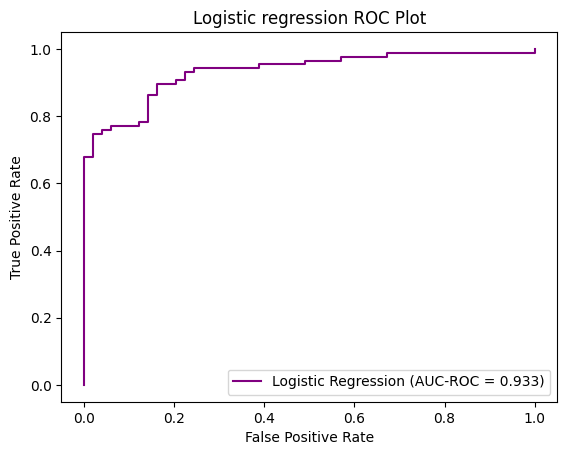

In [26]:
rflr_fpr, rflr_tpr, _ = roc_curve(y_test, rflr_probs)

plt.plot(rflr_fpr, rflr_tpr, label='Logistic Regression (AUC-ROC = %0.3f)' % rflr_auc, color='purple')
# Title
plt.title('Logistic regression ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #

plt.savefig('Logistic Regression ROC Plot')

# Show plot
plt.show()

**KNeighborsClassifier**

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79        49
           1       0.94      0.77      0.85        87

    accuracy                           0.82       136
   macro avg       0.82      0.84      0.82       136
weighted avg       0.85      0.82      0.83       136



**Confusion Matrix**

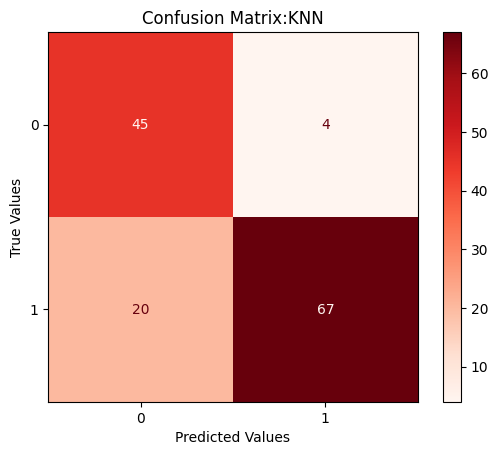

In [28]:
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix:KNN')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()


In [29]:
rknn_probs = [0 for _ in range(len(y_test))]
rfknn_probs = knn.predict_proba(X_test)

rfknn_probs = rfknn_probs[:, 1]

rfknn_auc = roc_auc_score(y_test, rfknn_probs)
print('KNN: AUC_ROC = %.3f' % (rfknn_auc))

KNN: AUC_ROC = 0.935


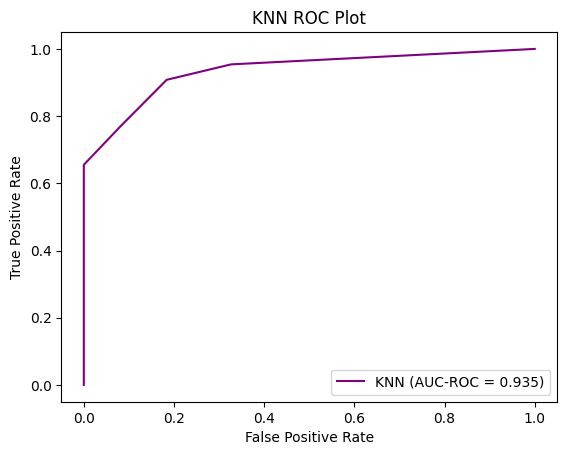

In [31]:
rfknn_fpr, rfknn_tpr,_ = roc_curve(y_test, rfknn_probs)

plt.plot(rfknn_fpr, rfknn_tpr, label='KNN (AUC-ROC = %0.3f)' % rfknn_auc, color='purple')
# Title
plt.title('KNN ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #

plt.savefig('KNN ROC Plot')

# Show plot
plt.show()

**DecisionTree**

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        49
           1       0.93      0.86      0.89        87

    accuracy                           0.87       136
   macro avg       0.85      0.87      0.86       136
weighted avg       0.87      0.87      0.87       136



**Confusion Matrix**

In [34]:
confusion_matrix(y_test,y_pred)

array([[43,  6],
       [12, 75]])

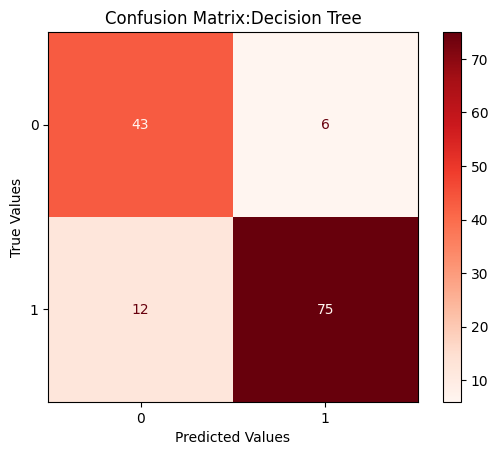

In [35]:
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix:Decision Tree')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

**ROC**

In [36]:

rdt_probs = [0 for _ in range(len(y_test))]
rfdt_probs = dtr.predict_proba(X_test)

rfdt_probs = rfdt_probs[:, 1]

rfdt_auc = roc_auc_score(y_test, rfdt_probs)
print('Decision Tree: AUC_ROC = %.3f' % (rfdt_auc))


Decision Tree: AUC_ROC = 0.870


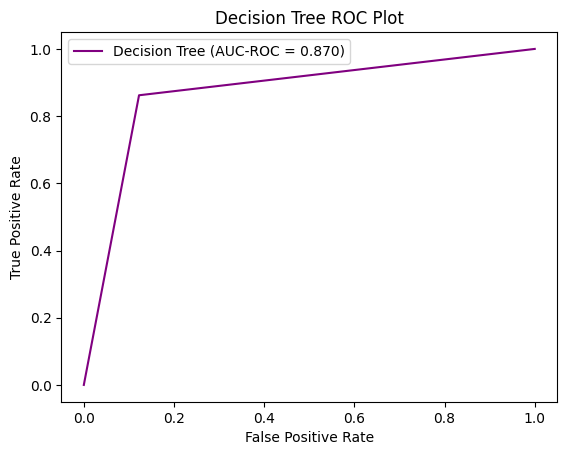

In [37]:
rfdt_fpr, rfdt_tpr, _ = roc_curve(y_test, rfdt_probs)

plt.plot(rfdt_fpr, rfdt_tpr, label='Decision Tree (AUC-ROC = %0.3f)' % rfdt_auc, color='purple')
# Title
plt.title('Decision Tree ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #

plt.savefig('Decision Tree ROC Plot')

# Show plot
plt.show()


**RandomForestClassifier**

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        49
           1       0.93      0.91      0.92        87

    accuracy                           0.90       136
   macro avg       0.89      0.89      0.89       136
weighted avg       0.90      0.90      0.90       136



**Confusion** **matrix**

In [39]:
confusion_matrix(y_test,y_pred)

array([[43,  6],
       [ 8, 79]])

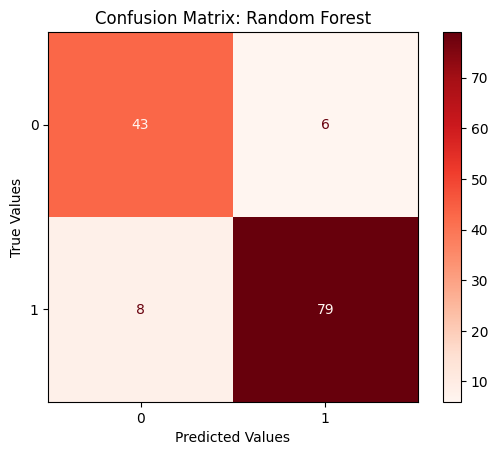

In [40]:
cm= confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()


**Evaluation Metrics-ROC**

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

rrf_probs = [0 for _ in range(len(y_test))]
rfrf_probs = rfc.predict_proba(X_test)

rfrf_probs = rfrf_probs[:, 1]

rfrf_auc = roc_auc_score(y_test, rfrf_probs)
print('Random Forest: AUC_ROC = %.3f' % (rfrf_auc))


Random Forest: AUC_ROC = 0.958


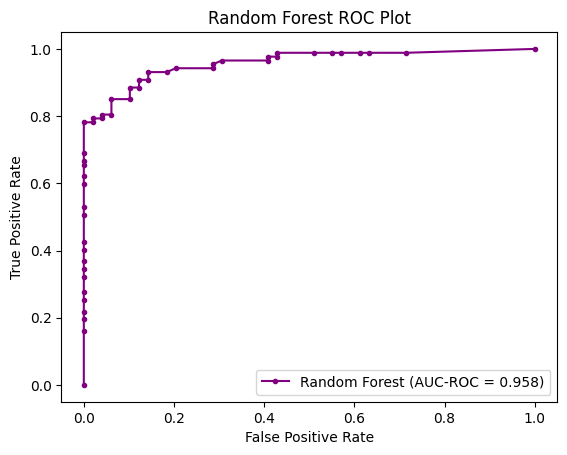

In [42]:
rfrf_fpr, rfrf_tpr, _ = roc_curve(y_test, rfrf_probs)

plt.plot(rfrf_fpr, rfrf_tpr, marker='.', label='Random Forest (AUC-ROC = %0.3f)' % rfrf_auc, color='purple')
# Title
plt.title('Random Forest ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #

plt.savefig('Random Forest ROC Plot')

# Show plot
plt.show()

**XGBoost**

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=20)
xgb.fit(X_train,y_train) # creating of the model
y_pred=xgb.predict(X_test)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88        49
           1       0.96      0.90      0.93        87

    accuracy                           0.91       136
   macro avg       0.90      0.92      0.91       136
weighted avg       0.92      0.91      0.91       136



**Confusion Matrix**

In [45]:
confusion_matrix(y_test,y_pred)

array([[46,  3],
       [ 9, 78]])

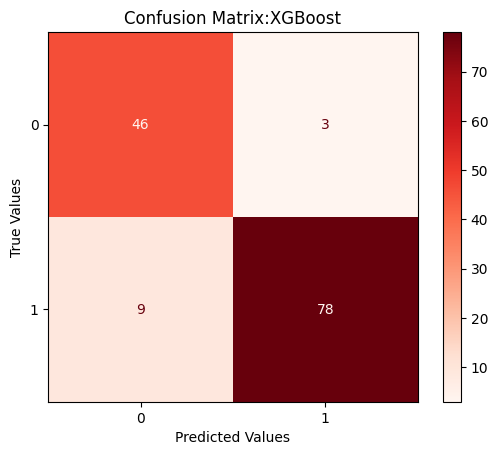

In [46]:
cm= confusion_matrix(y_test,y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix:XGBoost')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

**Evaluation Matrix: ROC**

In [47]:
rxgb_probs = [0 for _ in range(len(y_test))]
rfxgb_probs = xgb.predict_proba(X_test)

rfxgb_probs = rfxgb_probs[:, 1]

rfxgb_auc = roc_auc_score(y_test, rfxgb_probs)
print('XGBoost: AUC_ROC = %.3f' % (rfxgb_auc))

XGBoost: AUC_ROC = 0.971


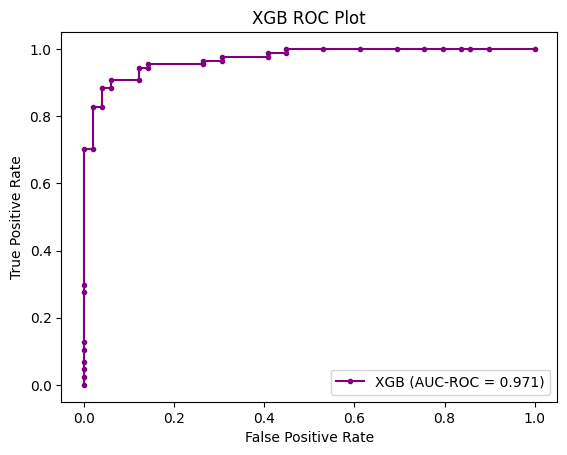

In [49]:
rfxgb_fpr, rfxgb_tpr, _ = roc_curve(y_test, rfxgb_probs)

plt.plot(rfxgb_fpr, rfxgb_tpr, marker='.', label='XGB (AUC-ROC = %0.3f)' % rfxgb_auc, color='purple')
# Title
plt.title('XGB ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #

plt.savefig('XGBoost ROC Plot')

# Show plot
plt.show()


**NN**

In [50]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential


In [52]:
nn = Sequential()

nn.add(Dense(12, input_dim=881, activation='relu'))

nn.add(Dense(6, activation='relu'))


nn.add(Dense(1, activation='sigmoid'))

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
nn.fit(X_train, y_train, epochs=100,validation_split=0.2, batch_size=50)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6249 - loss: 0.6578 - val_accuracy: 0.6744 - val_loss: 0.5830
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7899 - loss: 0.4660 - val_accuracy: 0.6811 - val_loss: 0.5552
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8162 - loss: 0.3930 - val_accuracy: 0.6844 - val_loss: 0.5378
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8438 - loss: 0.3410 - val_accuracy: 0.7176 - val_loss: 0.4897
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8496 - loss: 0.3229 - val_accuracy: 0.7674 - val_loss: 0.4452
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8761 - loss: 0.2786 - val_accuracy: 0.7708 - val_loss: 0.4430
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9024 - loss: 0.2480 - val_accuracy: 0.7741 - val_loss: 0.4373
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9177 - loss: 0.2317 - val_accuracy: 0.8173 - 

In [55]:
y_pred = nn.predict(X_test).round()


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        49
           1       0.93      0.91      0.92        87

    accuracy                           0.90       136
   macro avg       0.89      0.89      0.89       136
weighted avg       0.90      0.90      0.90       136



In [56]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[43,  6],
       [ 8, 79]])

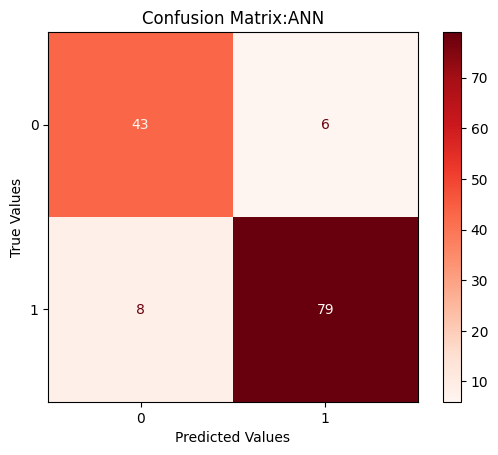

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm= confusion_matrix(y_test,y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix:ANN')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        49
           1       0.93      0.91      0.92        87

    accuracy                           0.90       136
   macro avg       0.89      0.89      0.89       136
weighted avg       0.90      0.90      0.90       136



In [60]:
rfann_auc = roc_auc_score(y_test, y_pred)
print('NN: AUC_ROC = %.3f' % (rfann_auc))

NN: AUC_ROC = 0.893


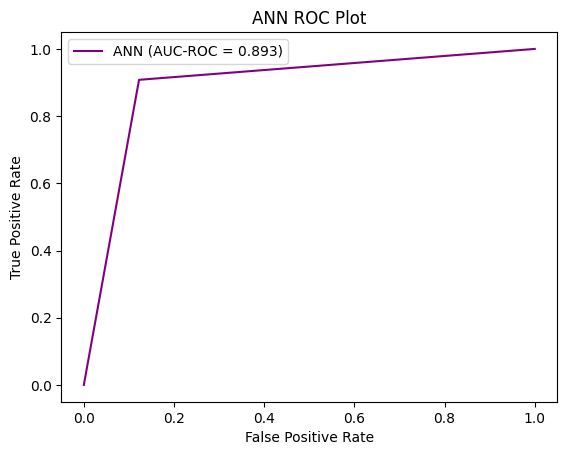

In [61]:
rfann_fpr, rfann_tpr, _ = roc_curve(y_test, y_pred)

plt.plot(rfann_fpr, rfann_tpr, label='ANN (AUC-ROC = %0.3f)' % rfann_auc, color='purple')
# Title
plt.title('ANN ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #

plt.savefig('ANN ROC Plot')

# Show plot
plt.show()

**All ROC plots Combined**

In [62]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

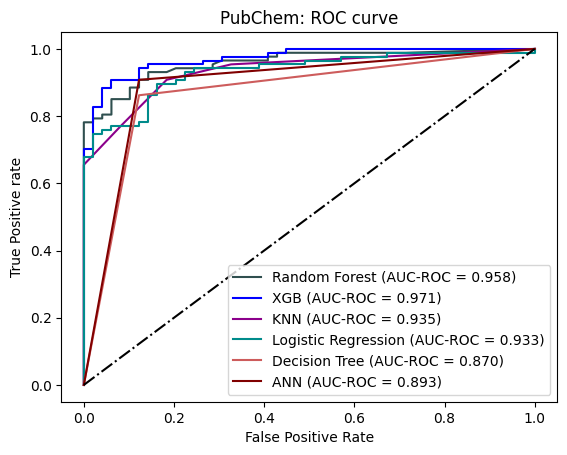

In [63]:

# plot roc curves

plt.plot(rfrf_fpr, rfrf_tpr,  label='Random Forest (AUC-ROC = %0.3f)' % rfrf_auc, color='darkslategray')
plt.plot(rfxgb_fpr, rfxgb_tpr,  label='XGB (AUC-ROC = %0.3f)' % rfxgb_auc, color='blue')
plt.plot(rfknn_fpr, rfknn_tpr, label='KNN (AUC-ROC = %0.3f)' % rfknn_auc, color='darkmagenta')
plt.plot(rflr_fpr, rflr_tpr, label='Logistic Regression (AUC-ROC = %0.3f)' % rflr_auc, color='darkcyan')
plt.plot(rfdt_fpr, rfdt_tpr, label='Decision Tree (AUC-ROC = %0.3f)' % rfdt_auc, color='indianred')
plt.plot(rfann_fpr, rfann_tpr, label='ANN (AUC-ROC = %0.3f)' % rfann_auc, color='maroon')


plt.plot(p_fpr, p_tpr, linestyle='-.', color='black')

# title
plt.title('PubChem: ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('pubchem: ROC curve',dpi=300)
plt.show();

**Model saving**

In [64]:
import pickle

In [66]:
pickle.dump(xgb, open('xgb_pubchem_2.pkl', 'wb'))

